# Vaccine Adverse Event Reporting System (VAERS) 

Is a national early warning system to detect possible safety problems in U.S. licensed vaccines. VAERS is co-managed by the Centers for Disease Control and Prevention (CDC) and the U.S. Food and Drug Administration (FDA).

# 1. Problem Definition

# Data

The data came from the Centers for Disease Control and Prevention (CDC) WONDER database: https://wonder.cdc.gov/

# 4. Features

The U.S. Department of Health and Human Services provides a PDF VAERS Data Use Guide, which can be accessed through: https://vaers.hhs.gov/docs/VAERSDataUseGuide_November2020.pdf.

This project will utilize the fields of the VAERSDATA.CSV (2020).

### VAERS Data Dictionary (VAERSDATA.CSV)

<p style="text-align: center;"> <b>4.1 VAERS Data Description</b> </p>
<img src="img/vaers-data-dictionary1.png" height="600px" width="600px"/>

<p style="text-align: center;"> <b>4.2 VAERS Data Description</b> </p>
<img src="img/vaers-data-dictionary2.png" height="600px" width="600px"/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [79]:
df = pd.read_csv("data/2020VAERSDATA.csv")
df.head().T

,0,1,2,3,4
VAERS_ID,855017,855018,855019,855020,855021
RECVDATE,01/01/2020,01/01/2020,01/01/2020,01/01/2020,01/01/2020
STATE,HI,WI,NaN,TX,NaN
AGE_YRS,55.0,68.0,50.0,67.0,73.0
CAGE_YR,55.0,68.0,50.0,67.0,73.0
CAGE_MO,NaN,NaN,NaN,NaN,NaN
SEX,F,F,F,F,F
RPT_DATE,NaN,NaN,NaN,NaN,NaN
SYMPTOM_TEXT,Symptoms occurred almost immediately- aching j...,"Extreme pain, muscle weakness in right arm so ...",SORENESS IN THE AREA. ITCHING AND RASH,"sore arm, fever 101 , chills, and aching musc...",Patient presented to Clinic today 1/1/2020. Sh...
DIED,NaN,NaN,NaN,NaN,NaN


In [9]:
# Length of the dataframe

len(df)

43588

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43588 entries, 0 to 43587
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      43588 non-null  int64  
 1   RECVDATE      43588 non-null  object 
 2   STATE         37643 non-null  object 
 3   AGE_YRS       33260 non-null  float64
 4   CAGE_YR       31900 non-null  float64
 5   CAGE_MO       2679 non-null   float64
 6   SEX           43588 non-null  object 
 7   RPT_DATE      920 non-null    object 
 8   SYMPTOM_TEXT  43584 non-null  object 
 9   DIED          166 non-null    object 
 10  DATEDIED      93 non-null     object 
 11  L_THREAT      312 non-null    object 
 12  ER_VISIT      165 non-null    object 
 13  HOSPITAL      1583 non-null   object 
 14  HOSPDAYS      673 non-null    float64
 15  X_STAY        27 non-null     object 
 16  DISABLE       915 non-null    object 
 17  RECOVD        40303 non-null  object 
 18  VAX_DATE      38111 non-nu

In [30]:
df.describe()

,VAERS_ID,AGE_YRS,CAGE_YR,CAGE_MO,HOSPDAYS,NUMDAYS,FORM_VERS
count,43588.000000,33260.000000,31900.000000,2679.000000,673.000000,34433.000000,43588.000000
mean,884566.419313,44.223211,44.321724,0.301530,7.264487,27.674731,1.977746
std,16881.281157,24.570201,24.830733,0.255034,21.157112,634.295519,0.147510
min,855017.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,870437.750000,25.000000,25.000000,0.100000,1.000000,0.000000,2.000000
50%,884503.500000,50.000000,51.000000,0.300000,3.000000,0.000000,2.000000
75%,897969.250000,65.000000,65.000000,0.500000,6.000000,1.000000,2.000000
max,918442.000000,115.000000,117.000000,1.000000,365.000000,31011.000000,2.000000


In [14]:
# Sum of rows without values

empty_rows = df.isna().sum()
empty_rows

VAERS_ID            0
RECVDATE            0
STATE            5945
AGE_YRS         10328
CAGE_YR         11688
CAGE_MO         40909
SEX                 0
RPT_DATE        42668
SYMPTOM_TEXT        4
DIED            43422
DATEDIED        43495
L_THREAT        43276
ER_VISIT        43423
HOSPITAL        42005
HOSPDAYS        42915
X_STAY          43561
DISABLE         42673
RECOVD           3285
VAX_DATE         5477
ONSET_DATE       7558
NUMDAYS          9155
LAB_DATA        29526
V_ADMINBY           0
V_FUNDBY        42618
OTHER_MEDS      21279
CUR_ILL         24844
HISTORY         22176
PRIOR_VAX       41683
SPLTTYPE        27654
FORM_VERS           0
TODAYS_DATE      1369
BIRTH_DEFECT    43566
OFC_VISIT       35178
ER_ED_VISIT     39512
ALLERGIES       23385
dtype: int64

In [15]:
# The precentage of columns without data

empty_rows / len(df)

VAERS_ID        0.000000
RECVDATE        0.000000
STATE           0.136391
AGE_YRS         0.236946
CAGE_YR         0.268147
CAGE_MO         0.938538
SEX             0.000000
RPT_DATE        0.978893
SYMPTOM_TEXT    0.000092
DIED            0.996192
DATEDIED        0.997866
L_THREAT        0.992842
ER_VISIT        0.996215
HOSPITAL        0.963683
HOSPDAYS        0.984560
X_STAY          0.999381
DISABLE         0.979008
RECOVD          0.075365
VAX_DATE        0.125654
ONSET_DATE      0.173396
NUMDAYS         0.210035
LAB_DATA        0.677388
V_ADMINBY       0.000000
V_FUNDBY        0.977746
OTHER_MEDS      0.488185
CUR_ILL         0.569973
HISTORY         0.508764
PRIOR_VAX       0.956295
SPLTTYPE        0.634441
FORM_VERS       0.000000
TODAYS_DATE     0.031408
BIRTH_DEFECT    0.999495
OFC_VISIT       0.807057
ER_ED_VISIT     0.906488
ALLERGIES       0.536501
dtype: float64

In [17]:
df["SEX"].value_counts()

F    25905
M    11505
U     6178
Name: SEX, dtype: int64

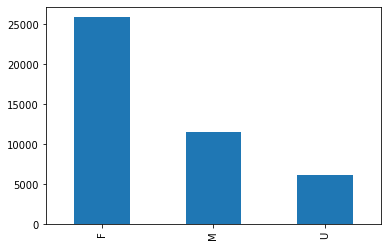

In [19]:
df.SEX.value_counts().plot(kind="bar");

In [20]:
df["AGE_YRS"].value_counts()

66.00     853
65.00     848
4.00      748
67.00     736
60.00     663
         ... 
115.00      1
1.60        1
4.67        1
2.75        1
0.00        1
Name: AGE_YRS, Length: 141, dtype: int64

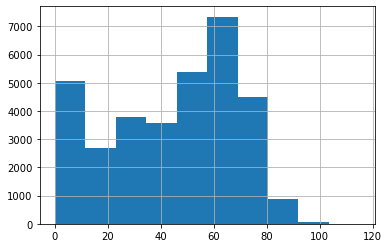

In [25]:
df["AGE_YRS"].hist();

In [26]:
df["CAGE_YR"].value_counts()

0.0      1316
1.0      1149
66.0      846
65.0      813
67.0      739
         ... 
117.0       1
109.0       1
106.0       1
99.0        1
101.0       1
Name: CAGE_YR, Length: 106, dtype: int64

<AxesSubplot:>

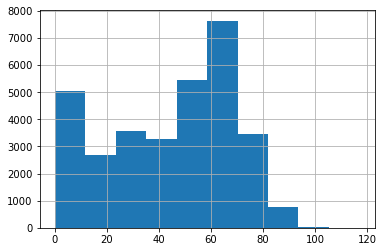

In [27]:
df["CAGE_YR"].hist()

In [57]:
reported_death = df[df["DIED"] =='Y']

In [67]:
# Cross table of vaccinated-related deaths by state

death_by_state = pd.crosstab(df.STATE, df.DIED)
death_by_state

DIED,Y
STATE,
AL,2
AR,2
AZ,2
CA,12
CO,2
FL,10
GA,1
IA,2
IL,5


In [71]:
print(f"In 2020, based on reported data. {len(death_by_state)} out of 50 states attributed a death related to vaccinations.")

In 2020, based on reported data. 36 out of 50 states attributed a death related to vaccinations.


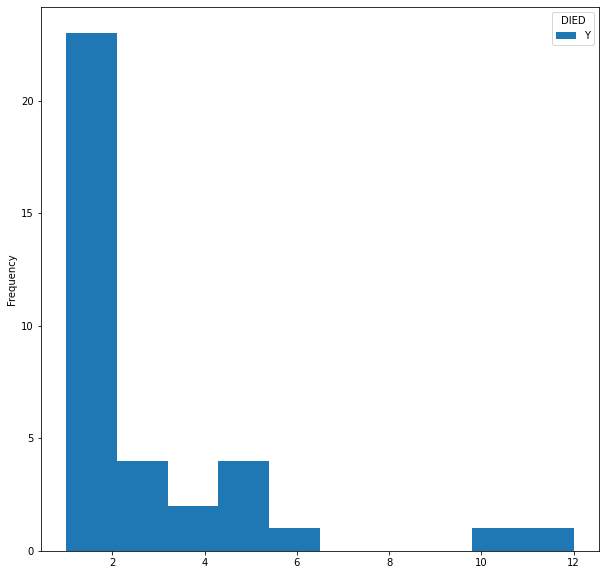

In [80]:
death_by_state.plot(kind="hist", figsize=(10,10));

In [88]:
# Create a copy of the dataframe for manipulation
df_vaers = df.copy()

### Parse columns with dates

In [89]:
# list columns that are objects 
for label, content in df_vaers.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

STATE
SEX
SYMPTOM_TEXT
DIED
L_THREAT
ER_VISIT
HOSPITAL
X_STAY
DISABLE
RECOVD
LAB_DATA
V_ADMINBY
V_FUNDBY
OTHER_MEDS
CUR_ILL
HISTORY
PRIOR_VAX
SPLTTYPE
BIRTH_DEFECT
OFC_VISIT
ER_ED_VISIT
ALLERGIES


In [90]:
# Convert colums into dates

df_vaers = pd.read_csv("data/2020VAERSDATA.csv", parse_dates=["RECVDATE", "RPT_DATE", "DATEDIED", "VAX_DATE", "ONSET_DATE", "TODAYS_DATE"])

In [116]:
df_vaers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43588 entries, 0 to 43587
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   VAERS_ID      43588 non-null  int64         
 1   RECVDATE      43588 non-null  datetime64[ns]
 2   STATE         37643 non-null  object        
 3   AGE_YRS       33260 non-null  float64       
 4   CAGE_YR       31900 non-null  float64       
 5   CAGE_MO       2679 non-null   float64       
 6   SEX           43588 non-null  category      
 7   RPT_DATE      920 non-null    datetime64[ns]
 8   SYMPTOM_TEXT  43584 non-null  category      
 9   DIED          166 non-null    category      
 10  DATEDIED      93 non-null     datetime64[ns]
 11  L_THREAT      312 non-null    category      
 12  ER_VISIT      165 non-null    category      
 13  HOSPITAL      1583 non-null   category      
 14  HOSPDAYS      673 non-null    float64       
 15  X_STAY        27 non-null     catego

In [117]:
# Uppercase abbreviations before changing datatype
df_vaers.STATE = df_vaers.STATE.str.upper()

### Convert strings to categories

In [118]:
# convert columns that contain strings to catergories

for label, content in df_vaers.items():
    if pd.api.types.is_string_dtype(content):
        df_vaers[label] = content.astype("category")

In [119]:
df_vaers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43588 entries, 0 to 43587
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   VAERS_ID      43588 non-null  int64         
 1   RECVDATE      43588 non-null  datetime64[ns]
 2   STATE         37643 non-null  category      
 3   AGE_YRS       33260 non-null  float64       
 4   CAGE_YR       31900 non-null  float64       
 5   CAGE_MO       2679 non-null   float64       
 6   SEX           43588 non-null  category      
 7   RPT_DATE      920 non-null    datetime64[ns]
 8   SYMPTOM_TEXT  43584 non-null  category      
 9   DIED          166 non-null    category      
 10  DATEDIED      93 non-null     datetime64[ns]
 11  L_THREAT      312 non-null    category      
 12  ER_VISIT      165 non-null    category      
 13  HOSPITAL      1583 non-null   category      
 14  HOSPDAYS      673 non-null    float64       
 15  X_STAY        27 non-null     catego

In [120]:
df_vaers.STATE.cat.categories

Index(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'FM',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MH', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'PW', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

In [121]:
df_vaers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43588 entries, 0 to 43587
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   VAERS_ID      43588 non-null  int64         
 1   RECVDATE      43588 non-null  datetime64[ns]
 2   STATE         37643 non-null  category      
 3   AGE_YRS       33260 non-null  float64       
 4   CAGE_YR       31900 non-null  float64       
 5   CAGE_MO       2679 non-null   float64       
 6   SEX           43588 non-null  category      
 7   RPT_DATE      920 non-null    datetime64[ns]
 8   SYMPTOM_TEXT  43584 non-null  category      
 9   DIED          166 non-null    category      
 10  DATEDIED      93 non-null     datetime64[ns]
 11  L_THREAT      312 non-null    category      
 12  ER_VISIT      165 non-null    category      
 13  HOSPITAL      1583 non-null   category      
 14  HOSPDAYS      673 non-null    float64       
 15  X_STAY        27 non-null     catego